[![AnalyticsDojo](../fig/final-logo.png)](http://rpi.analyticsdojo.com)
<center><h1>Introduction to Modeling - Boston Housing R </h1></center>
<center><h3><a href = 'http://rpi.analyticsdojo.com'>rpi.analyticsdojo.com</a></h3></center>

In [7]:
#Run this once
#install.packages('mlbench')
BostonHousing<-read.csv("../input/boston.csv")
#http://rss.acs.unt.edu/Rdoc/library/mlbench/html/BostonHousing.html 

#medv   median value of owner-occupied homes in USD 1000's
# inspect the range which is 1-50
summary(BostonHousing$medv)
str(BostonHousing)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   17.02   21.20   22.53   25.00   50.00 

'data.frame':	506 obs. of  15 variables:
 $ X      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ b      : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [9]:
##
## model linear regression (lm command)  

lm.fit <- lm(medv ~ ., data=BostonHousing)
#This provides the summary.
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = BostonHousing)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.8948  -2.7585  -0.4663   1.7963  26.0911 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.461352   5.100994   7.148 3.21e-12 ***
X            -0.002526   0.002080  -1.215 0.225046    
crim         -0.108762   0.032855  -3.310 0.001000 ** 
zn            0.048031   0.013785   3.484 0.000538 ***
indus         0.019932   0.061468   0.324 0.745871    
chas          2.705245   0.861298   3.141 0.001786 ** 
nox         -17.541602   3.822390  -4.589 5.66e-06 ***
rm            3.839225   0.418422   9.175  < 2e-16 ***
age          -0.001938   0.013380  -0.145 0.884866    
dis          -1.493304   0.199892  -7.471 3.68e-13 ***
rad           0.324925   0.068111   4.771 2.43e-06 ***
tax          -0.011598   0.003807  -3.046 0.002443 ** 
ptratio      -0.947985   0.130822  -7.246 1.67e-12 ***
b             0.009357   0.002685   3.485 0.000536 ***
lsta

In [10]:
#This provides a prediction
lm.predict <- predict(lm.fit)


In [11]:
#mean=22.53
mean(BostonHousing$medv)
# mean squared error: 21.89483
mean((lm.predict - BostonHousing$medv)^2) 


[1] 22.53281

[1] 21.82923

In [12]:
#This manually calcuates the R2
1-sum((lm.predict - BostonHousing$medv)^2)/sum((BostonHousing$medv-mean(BostonHousing$medv))^2)


[1] 0.7414198

In [13]:
#This manually calcuates the R2
1-sum((22.5328063241107 - BostonHousing$medv)^2)/sum((BostonHousing$medv-mean(BostonHousing$medv))^2)



[1] 0

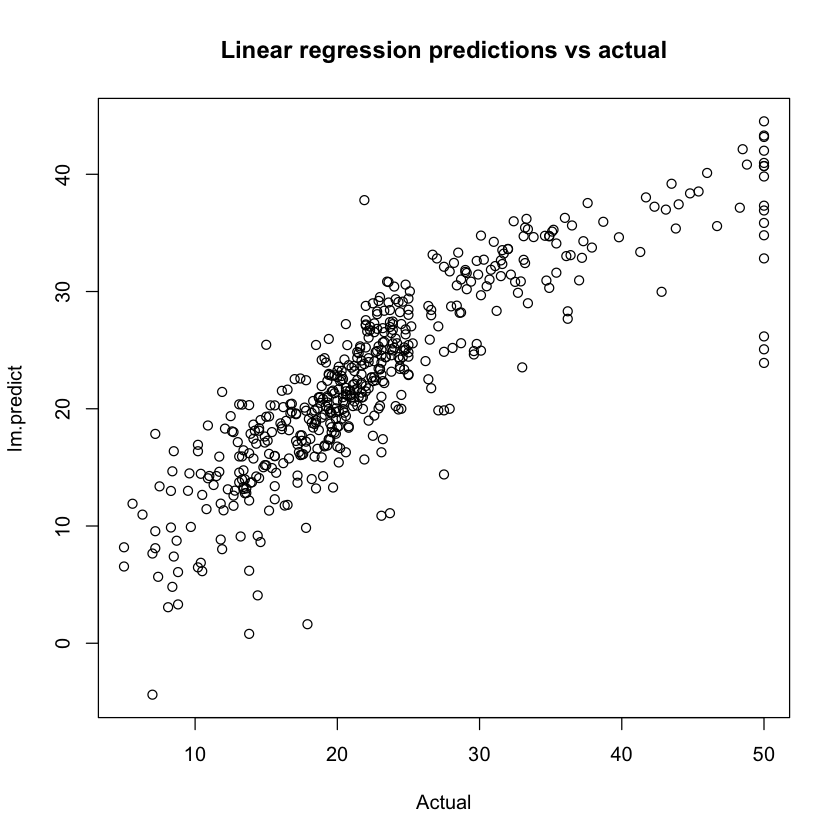

In [14]:
#plot theoretical vs actual.
plot(BostonHousing$medv, lm.predict,
     main="Linear regression predictions vs actual",
     xlab="Actual")

write.csv(BostonHousing, "boston.csv")